# 0. Setup Paths

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#rm -rf /content/drive/MyDrive/TFOD/Tensorflow/

In [3]:
import tensorflow as tf

In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
!nvidia-smi

Sat Oct 15 17:24:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import os

In [7]:
pwd

'/content'

In [8]:
########################################################
##################  For Colab  #########################
########################################################

if not os.path.exists("/content/drive/MyDrive/TFOD/"):
  !mkdir -p "/content/drive/MyDrive/TFOD/"
      

In [9]:
cd '/content/drive/MyDrive/TFOD/'

/content/drive/MyDrive/TFOD


In [10]:
CUSTOM_MODEL_NAME = 'my_ssd_resnet50_v1_fpn_640x640' 
PRETRAINED_MODEL_NAME = 'ssd_resnet50_v1_fpn_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz'
#TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
TF_RECORD_SCRIPT_NAME = 'CSV_generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [11]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [12]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [13]:
files

{'PIPELINE_CONFIG': 'Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640/pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow/scripts/CSV_generate_tfrecord.py',
 'LABELMAP': 'Tensorflow/workspace/annotations/label_map.pbtxt'}

In [14]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [15]:
paths

{'WORKSPACE_PATH': 'Tensorflow/workspace',
 'SCRIPTS_PATH': 'Tensorflow/scripts',
 'APIMODEL_PATH': 'Tensorflow/models',
 'ANNOTATION_PATH': 'Tensorflow/workspace/annotations',
 'IMAGE_PATH': 'Tensorflow/workspace/images',
 'MODEL_PATH': 'Tensorflow/workspace/models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow/workspace/pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640',
 'OUTPUT_PATH': 'Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640/export',
 'TFJS_PATH': 'Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640/tfjsexport',
 'TFLITE_PATH': 'Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640/tfliteexport',
 'PROTOC_PATH': 'Tensorflow/protoc'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [124]:
# https://www.tensorflow.org/install/source_windows

In [125]:
if os.name=='nt':
    !pip install wget
    import wget

In [126]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 77987, done.
remote: Counting objects: 100% (395/395), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 77987 (delta 239), reused 321 (delta 193), pack-reused 77592
Receiving objects: 100% (77987/77987), 593.50 MiB | 15.84 MiB/s, done.
Resolving deltas: 100% (55394/55394), done.
Checking out files: 100% (3180/3180), done.


In [22]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    #url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.19.6/protoc-3.19.6-win64.zip"
    wget.download(url)
    #!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !move protoc-3.19.6-win64.zip {paths['PROTOC_PATH']}
    #!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.19.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/TFOD/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.9 MB 17.0 MB/s 
     |███████████

In [23]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-10-15 17:37:25.279314: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-15 17:37:26.160773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-15 17:37:26.161022: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-15 17:37:26.161053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [129]:
# if you don't see 'OK (skipped=1)' thing in above cell then you must be encountered with errors
# just simply uninstall and re-install packages which are shown in the errors

# pip uninstall protobuf matplotlib -y
# pip install protobuf matplotlib==3.2.2
#!pip install tensorflow-gpu --upgrade
#!pip uninstall protobuf matplotlib -y
#!pip install protobuf matplotlib
#!pip install Pillow
#!pip install pyyaml

In [130]:
#!pip list

In [131]:
import object_detection

In [132]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-10-15 04:30:07--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.4.128, 2404:6800:4003:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.4.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M  53.8MB/s    in 4.3s    

2022-10-15 04:30:13 (53.8 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50

# 2. Create Label Map

In [133]:
labels = [{'name':'mask', 'id':1}, {'name':'no-mask', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [134]:
#pwd

In [83]:
#rm -rf /content/drive/MyDrive/TFOD/Tensorflow/workspace/images/train

# 3. Create TF records

In [135]:
# #OPTIONAL IF RUNNING ON COLAB
# ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
# if os.path.exists(ARCHIVE_FILES):
#   !tar -zxvf {ARCHIVE_FILES}

dataset/train/
dataset/train/-1x-1_jpg.rf.22b305fece3a347760bb3c41d38c233b.jpg
dataset/train/-1x-1_jpg.rf.3068b9e8b2ad2a07aa26f023a5fda39f.jpg
dataset/train/-1x-1_jpg.rf.7c8af5f94bfdaa85f2cb76ac9e65bcf8.jpg
dataset/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.91396fa658508edfa783c9127c310541.jpg
dataset/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.9c02cf07d60af0c41ce0328335483da1.jpg
dataset/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.b8cf8297ad824fbb43e0370c45f8a793.jpg
dataset/train/0002526673_jpg.rf.3a00b68590d2c08a30a66c739c04f43c.jpg
dataset/train/0002526673_jpg.rf.7fafc14a360e2592eb7e85f259b5c975.jpg
dataset/train/0002526673_jpg.rf.cfeff0f64a1377e0890d468009942bcd.jpg
dataset/train/000b7b75-1600_jpg.rf.2e2b15d1544ee9b543ba8bd4f0dbd071.jpg
dataset/train/000b7b75-1600_jpg.rf.358932bb6eb5f6909ccb66a8da9ec05a.jpg
dataset/train/000b7b75-1600_jpg.rf.384a54284fbed13bf71767a02630cc1d.jpg
dataset/train/000_1ov3n5_0_jpeg.rf.4fc0b0eb395350e3aedc9b3c3f

In [16]:
files['TF_RECORD_SCRIPT']

'Tensorflow/scripts/CSV_generate_tfrecord.py'

In [136]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/mazqoty/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [137]:
#pwd

In [138]:
#os.path.join(paths['IMAGE_PATH'], 'train', 'train.csv')
files['TF_RECORD_SCRIPT']
# files['LABELMAP']
# os.path.join(paths['ANNOTATION_PATH'], 'train.record')

'Tensorflow/scripts/CSV_generate_tfrecord.py'

In [139]:
# Create TFRecords from XML Files
# !python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
# !python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

# Create TFRecords from CSV Files
!python {files['TF_RECORD_SCRIPT']} --csv_input={os.path.join(paths['IMAGE_PATH'], 'train', 'train.csv')} --image_dir={os.path.join(paths['IMAGE_PATH'], 'train')} --output_path={os.path.join(paths['ANNOTATION_PATH'], 'train.record')}
!python {files['TF_RECORD_SCRIPT']} --csv_input={os.path.join(paths['IMAGE_PATH'], 'test', 'test.csv')} --image_dir={os.path.join(paths['IMAGE_PATH'], 'test')} --output_path={os.path.join(paths['ANNOTATION_PATH'], 'test.record')}



2022-10-15 04:34:29.452458: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-15 04:34:30.145684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-15 04:34:30.145797: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-15 04:34:30.145818: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# 4. Copy Model Config to Training Folder

In [140]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [141]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [142]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [143]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_resnet50_v1_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 0.00039999998989515007
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5


In [144]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [145]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [146]:
files['PIPELINE_CONFIG']

'Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640/pipeline.config'

In [147]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [18]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [149]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=30000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [150]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640 --pipeline_config_path=Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640/pipeline.config --num_train_steps=30000


In [ ]:
!{command}

2022-10-15 04:35:10.864747: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-15 04:35:11.667459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-15 04:35:11.667594: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-15 04:35:11.667612: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# 7. Evaluate the Model

In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [25]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640 --pipeline_config_path=Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_resnet50_v1_fpn_640x640


In [26]:
!{command}

2022-10-15 17:40:23.883256: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-15 17:40:24.650742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-15 17:40:24.650857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-15 17:40:24.650882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [ ]:
#pwd

In [ ]:
#cd '/content/drive/MyDrive/TFOD/Tensorflow/workspace/models/my_ssd_mobnet/train'


In [ ]:
#pwd

In [ ]:
#!tensorboard --logdir=.

In [ ]:
#cd '/content/drive/MyDrive/TFOD'

# 8. Load Train Model From Checkpoint

In [27]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [28]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-20')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [133]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [135]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [136]:
testImagesPath = []
for root, dirs, files in os.walk(os.path.join(paths['IMAGE_PATH'], 'test')):
    for filename in files:
        if filename.find(".xml") == -1:
          testImagesPath.append(f"{root}/{filename}")

#testImagesPath

In [140]:
from pylab import rcParams

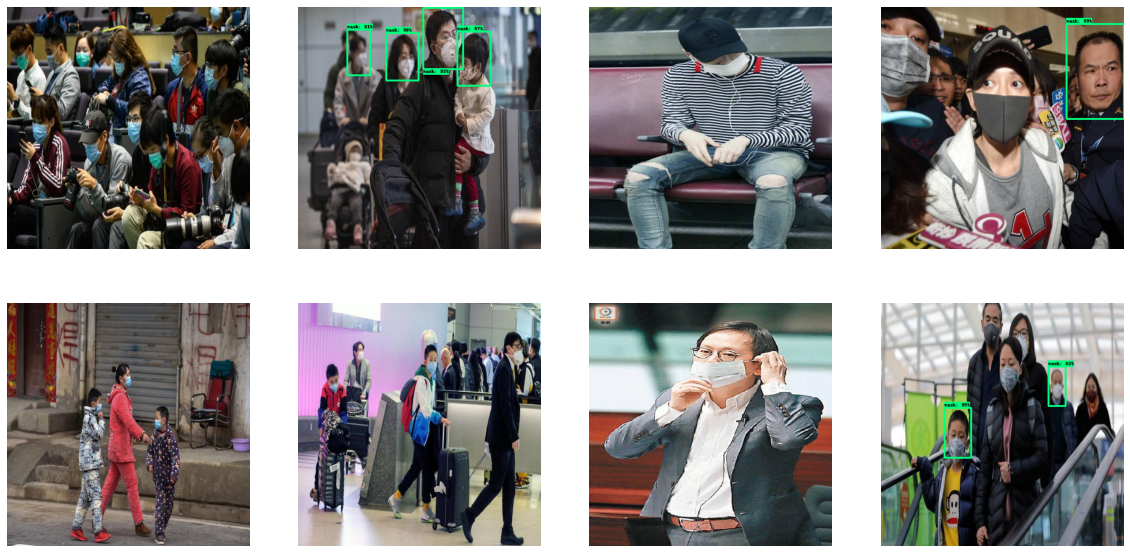

In [150]:
#8 random images to display at a time along with their true and random labels
rcParams['figure.figsize'] = 20, 10

num_row = 2
num_col = 4

imageId = np.random.randint(0, len(testImagesPath), num_row * num_col)

fig, axes = plt.subplots(num_row, num_col)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col) + j

        img = cv2.imread(testImagesPath[imageId[k]])
        image_np = np.array(img)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                    for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
                  image_np_with_detections,
                  detections['detection_boxes'],
                  detections['detection_classes']+label_id_offset,
                  detections['detection_scores'],
                  category_index,
                  use_normalized_coordinates=True,
                  max_boxes_to_draw=5,
                  min_score_thresh=.8,
                  agnostic_mode=False)



        axes[i,j].imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
        # axes[i,j].set_title("True: " + str(sub_category.iloc[test['fine_labels'][imageId[k]]][0]).capitalize() 
        #                      + "\nPredicted: " + str(sub_category.iloc[prediction.iloc[imageId[k]]]).split()[2].capitalize(), 
        #                     fontsize=14)
        axes[i,j].axis('off')
        #fig.suptitle("Images with True and Predicted Labels", fontsize = 18) 

plt.show()

In [ ]:
# for i in testImagesPath[:6]:
#   img = cv2.imread(i)
#   image_np = np.array(img)

#   input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
#   detections = detect_fn(input_tensor)

#   num_detections = int(detections.pop('num_detections'))
#   detections = {key: value[0, :num_detections].numpy()
#               for key, value in detections.items()}
#   detections['num_detections'] = num_detections

#   # detection_classes should be ints.
#   detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

#   label_id_offset = 1
#   image_np_with_detections = image_np.copy()

#   viz_utils.visualize_boxes_and_labels_on_image_array(
#             image_np_with_detections,
#             detections['detection_boxes'],
#             detections['detection_classes']+label_id_offset,
#             detections['detection_scores'],
#             category_index,
#             use_normalized_coordinates=True,
#             max_boxes_to_draw=5,
#             min_score_thresh=.8,
#             agnostic_mode=False)

#   plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
#   plt.show()


In [ ]:
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'maksssksksss750.png')

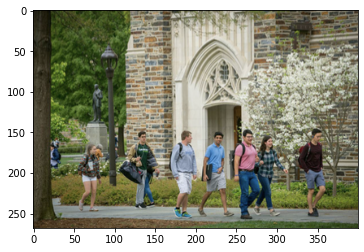

In [ ]:
# img = cv2.imread(IMAGE_PATH)
# image_np = np.array(img)

# input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
# detections = detect_fn(input_tensor)

# num_detections = int(detections.pop('num_detections'))
# detections = {key: value[0, :num_detections].numpy()
#               for key, value in detections.items()}
# detections['num_detections'] = num_detections

# # detection_classes should be ints.
# detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# label_id_offset = 1
# image_np_with_detections = image_np.copy()

# viz_utils.visualize_boxes_and_labels_on_image_array(
#             image_np_with_detections,
#             detections['detection_boxes'],
#             detections['detection_classes']+label_id_offset,
#             detections['detection_scores'],
#             category_index,
#             use_normalized_coordinates=True,
#             max_boxes_to_draw=5,
#             min_score_thresh=.8,
#             agnostic_mode=False)

# plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
# plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [ ]:
!{command}

2021-04-03 11:51:42.281339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.712115: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:51:44.712813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:51:44.734951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:51:44.734976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.738520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [ ]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [ ]:
!{command}

2021-04-03 11:55:05.530772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.004889: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:08.005672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:08.028532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:08.028559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.032092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [ ]:
!{command}

2021-04-03 11:55:38.653963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.159460: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:41.160164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:41.183623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:41.183649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.187402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
!pip freeze > colabRequirements.txt